## KNN using sample data

In [1]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
'''
Preprocessing is used to encode the dataset into Numerical
'''

'\nPreprocessing is used to encode the dataset into Numerical\n'

In [3]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
weather_encode = encoder.fit_transform(weather)
temp_encode = encoder.fit_transform(temp)
print(weather_encode)
print(" ")
print(temp_encode)
play_encode = encoder.fit_transform(play)
print("")
print(play_encode)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
 
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
import pandas as pd
import numpy as np

In [5]:
#data = list(zip(weather_encode,temp_encode))

In [6]:
weatherdf = pd.DataFrame(weather_encode,columns=['weather'])
weatherdf

,weather
0,2
1,2
2,0
3,1
4,1
5,1
6,0
7,2
8,2
9,1


In [7]:
tempdf = pd.DataFrame(temp_encode,columns=['temp'])
tempdf

,temp
0,1
1,1
2,1
3,2
4,0
5,0
6,0
7,2
8,0
9,2


In [8]:
features = pd.concat([weatherdf,tempdf],axis=1)
features

,weather,temp
0,2,1
1,2,1
2,0,1
3,1,2
4,1,0
5,1,0
6,0,0
7,2,2
8,2,0
9,1,2


In [9]:
label = pd.DataFrame(play_encode,columns=['play'])
label

,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [10]:
X = features[['weather','temp']]
y = label['play']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_values = pd.DataFrame({'Actual':y_test,'Pred':y_pred})
y_values

,Actual,Pred
8,1,1
6,1,1
4,1,1


In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(y_test,y_pred)

1.0

## Next Code 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris


In [18]:
data = load_iris()
type(data)

sklearn.utils.Bunch

In [19]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
iris_feature = pd.DataFrame(data.data,columns=data.feature_names)
iris_feature.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
iris_label = pd.DataFrame(data.target,columns=['target'])
iris_label.head()

,target
0,0
1,0
2,0
3,0
4,0


In [22]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
iris_label.shape

(150, 1)

In [24]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

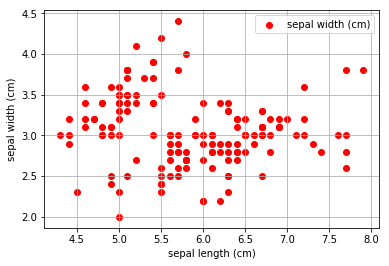

In [25]:
plt.scatter(iris_feature.iloc[:,0],iris_feature.iloc[:,1],c='r')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.grid()
plt.show()

In [26]:
X = iris_feature.iloc[:,:5]
y = iris_label.iloc[:,0]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_values = pd.DataFrame({'Actual':y_test,'Pred':y_pred})
y_values

,Actual,Pred
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


In [31]:
model.score(X,y) 

0.9666666666666667

In [32]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [33]:
metrics.confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

## Cancer Detetction

In [34]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df.shape

(569, 32)

In [36]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [37]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [39]:
data = df.drop(['diagnosis'],axis=1)
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:

from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
diagnosis_encode = encode.fit_transform(df.diagnosis)
diagnosisdf = pd.DataFrame(diagnosis_encode,columns=['diagnosis'])
diagnosisdf.head()


,diagnosis
0,1
1,1
2,1
3,1
4,1


In [41]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
'''
dummy = pd.get_dummies(df.diagnosis,drop_first=True)
dummy.head()
'''

'\ndummy = pd.get_dummies(df.diagnosis,drop_first=True)\ndummy.head()\n'

In [43]:
#dummy.describe()

In [44]:
diagnosisdf.describe()

,diagnosis
count,569.000000
mean,0.372583
std,0.483918
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [45]:
X = data.iloc[:,:]
y = diagnosisdf.iloc[:,0]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [47]:
for i in range(1,398,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy : ", metrics.accuracy_score(y_test,y_pred),'for',i )

Accuracy :  0.7719298245614035 for 1
Accuracy :  0.7485380116959064 for 3
Accuracy :  0.7192982456140351 for 5
Accuracy :  0.7017543859649122 for 7
Accuracy :  0.7017543859649122 for 9
Accuracy :  0.695906432748538 for 11
Accuracy :  0.695906432748538 for 13
Accuracy :  0.672514619883041 for 15
Accuracy :  0.672514619883041 for 17
Accuracy :  0.6783625730994152 for 19
Accuracy :  0.6666666666666666 for 21
Accuracy :  0.6900584795321637 for 23
Accuracy :  0.6842105263157895 for 25
Accuracy :  0.6842105263157895 for 27
Accuracy :  0.6783625730994152 for 29
Accuracy :  0.6491228070175439 for 31
Accuracy :  0.6491228070175439 for 33
Accuracy :  0.6491228070175439 for 35
Accuracy :  0.6491228070175439 for 37
Accuracy :  0.6491228070175439 for 39
Accuracy :  0.631578947368421 for 41
Accuracy :  0.6432748538011696 for 43
Accuracy :  0.6432748538011696 for 45
Accuracy :  0.6374269005847953 for 47
Accuracy :  0.6374269005847953 for 49
Accuracy :  0.6374269005847953 for 51
Accuracy :  0.62573099

In [48]:
#y_pred = knn.predict(X_test)

In [49]:
#y_values = pd.DataFrame({'Actual':y_test,'Pred':y_pred})
#y_values

In [50]:
#metrics.accuracy_score(y_test,y_pred)

In [51]:
#rint(metrics.confusion_matrix(y_test,y_pred))

In [52]:
from sklearn.preprocessing import StandardScaler
normal = StandardScaler()
X_train_normal = normal.fit_transform(X_train)
X_test_normal = normal.fit_transform(X_test)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [53]:
Kvalues = range(1,398,2)
Acurlist = []
for i in Kvalues:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_normal,y_train)
    y_pred_normal = model.predict(X_test_normal)
    Acurlist.append(metrics.accuracy_score(y_test,y_pred_normal))
print(Acurlist)

[0.9239766081871345, 0.9415204678362573, 0.9532163742690059, 0.9473684210526315, 0.9590643274853801, 0.9590643274853801, 0.9473684210526315, 0.9532163742690059, 0.9415204678362573, 0.9473684210526315, 0.9590643274853801, 0.9415204678362573, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.935672514619883, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 0.9415204678362573, 

In [54]:
y_pred_normal = model.predict(X_test_normal)

In [55]:
#y_values_normal = pd.DataFrame({'Actual':y_test,'Pred':y_pred_normal})
#y_values_normal

In [56]:
a = metrics.accuracy_score(y_test,y_pred_normal)
a

0.631578947368421

In [57]:
print(metrics.confusion_matrix(y_test,y_pred_normal))

[[108   0]
 [ 63   0]]


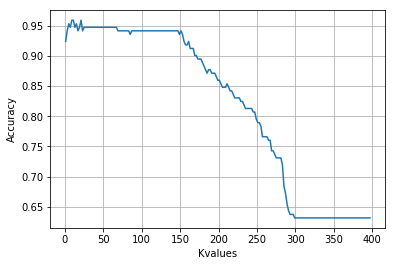

In [58]:
plt.plot(Kvalues,Acurlist)
#plt.scatter(Kvalues,Acurlist,linewidths=0.001,c='r')
plt.xlabel('Kvalues')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [59]:
print(max(Acurlist))

0.9590643274853801
